In [139]:
data = pd.read_csv("cleaned_hotel_bookings.csv",dtype={'agent': str,'company': str})

## Feature Selection

We select a mix of categorical and numerical features that are likely to influence booking cancellations, including deposit type,agent, market segment, lead time, and total of special requests

In [142]:
selected_categorical_cols = ['deposit_type', 'agent', 'market_segment']
encoded_categorical_df = pd.get_dummies(data[selected_categorical_cols], drop_first=True)
final_data_encoded = pd.concat([encoded_categorical_df, data[['lead_time', 'total_of_special_requests', 'is_canceled']]], axis = 1)

## Model Building

## Decision Tree Classifier

We begin with a Decision Tree classifier as a baseline model due to its simplicity and interpretability.  
It helps visualize the key features contribute to predicting booking cancellations.

This model works well with both categorical and numerical variables, but may overfit if not properly constrained (e.g., max depth).
We've also accounted for class imbalance to improve accuracy


Train Set : (89399,) (89399, 340)
Test Set  : (22350,) (22350, 340)


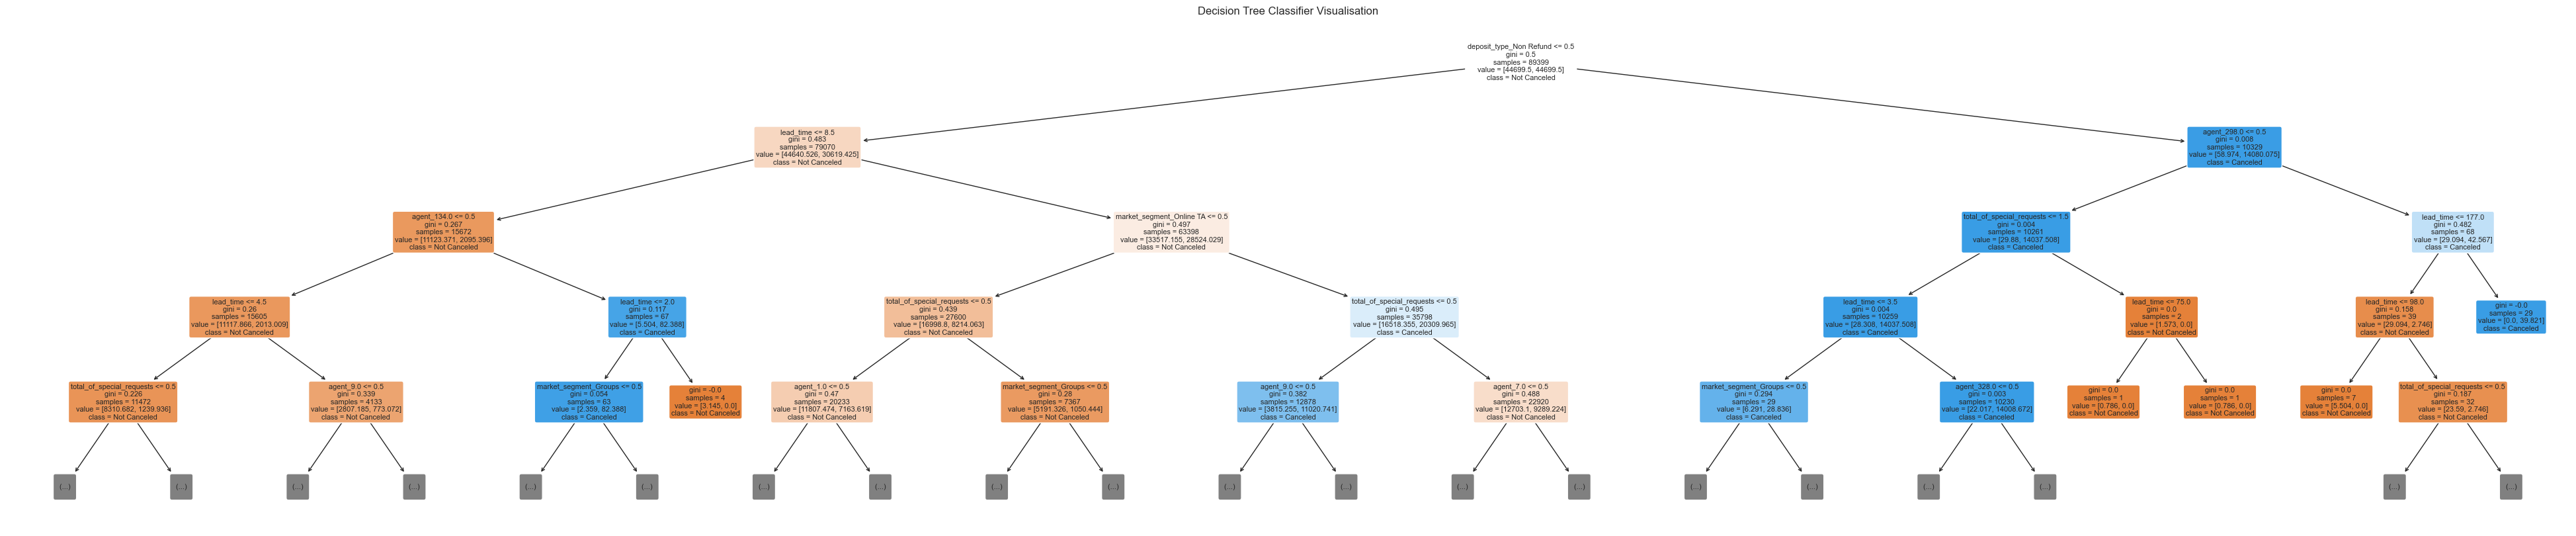

In [146]:
from sklearn.model_selection import train_test_split
'''from sklearn.linear_model import LinearRegression'''
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

X = final_data_encoded.drop(columns='is_canceled')
y = final_data_encoded['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

dectree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dectree.fit(X_train, y_train)

y_train_pred_dtc = dectree.predict(X_train)
y_test_pred_dtc = dectree.predict(X_test)

f = plt.figure(figsize=(50,10))
plot_tree(dectree, filled=True, rounded=True, feature_names=X_train.columns,
          class_names=['Not Canceled', 'Canceled'], max_depth=4)
plt.title("Decision Tree Classifier Visualisation")
plt.show()

In [147]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8435217396167742



In [148]:
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7891275167785234



<Axes: >

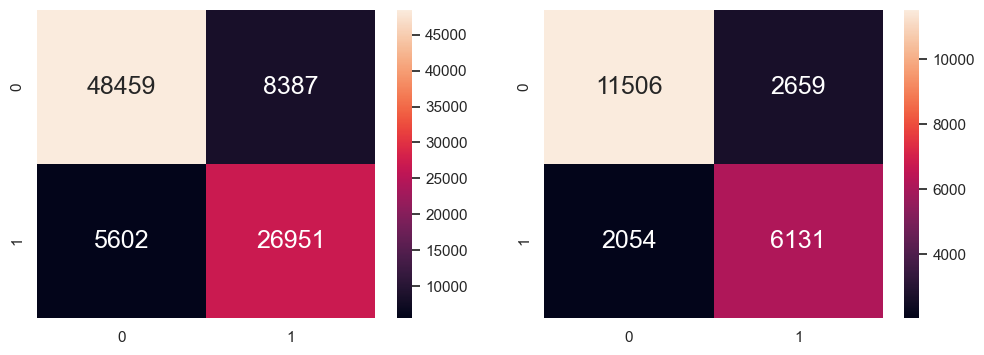

In [149]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred_dtc),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_dtc), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [126]:
dectree_accuracy = accuracy_score(y_test, y_test_pred_dtc)
dectree_report = classification_report(y_test, y_test_pred_dtc)
print(f"Accuracy Score of Decision Tree Classifier : {dectree_accuracy}")
print(f"Classification Report: \n{dectree_report}")

Accuracy Score of Decision Tree Classifier : 0.792751677852349
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     14174
           1       0.70      0.75      0.73      8176

    accuracy                           0.79     22350
   macro avg       0.78      0.78      0.78     22350
weighted avg       0.80      0.79      0.79     22350



## Evaluation: Decision Tree Classifier

The Decision Tree classifier achieved an **accuracy of 78.8%** on the test set.

### Key Observations:
- **Precision** for class `0` (not canceled) is high at **0.85**, indicating the model is good at correctly identifying non-canceled bookings.
- **Recall** for class `1` (canceled) is **0.75**, meaning the model captures 75% of actual cancellations.
- The **F1-score** for class `1` is **0.72**, showing a good balance between precision and recall.
- The model performs reasonably well across both classes, with a **macro average F1-score of 0.78**, suggesting balanced performance.

### Summary:
The Decision Tree provides a solid baseline with decent predictive power. It effectively captures both canceled and non-canceled bookings, although performance can potentially be improved by using more advanced ensemble methods or tuning.


In [ ]:
data.to_csv('cleaned_hotel_bookings.csv', index=False)